In [1]:
import numpy as np
import matplotlib.pyplot as plt



iteration 0, accuracy: 0.7327, loss: 1.5694
iteration 1, accuracy: 0.8124, loss: 1.0548
iteration 2, accuracy: 0.8393, loss: 0.9313
iteration 3, accuracy: 0.8522, loss: 0.8783
iteration 4, accuracy: 0.8679, loss: 0.7624
iteration 5, accuracy: 0.8701, loss: 0.7366


/tmp/ipykernel_46163/2450620388.py:35: RuntimeWarning: overflow encountered in exp
  out = 1/(1 + np.exp(-z))


iteration 6, accuracy: 0.8773, loss: 0.7177
iteration 7, accuracy: 0.8851, loss: 0.6155
iteration 8, accuracy: 0.8938, loss: 0.5466
iteration 9, accuracy: 0.8970, loss: 0.5267
error rate = 0.1064


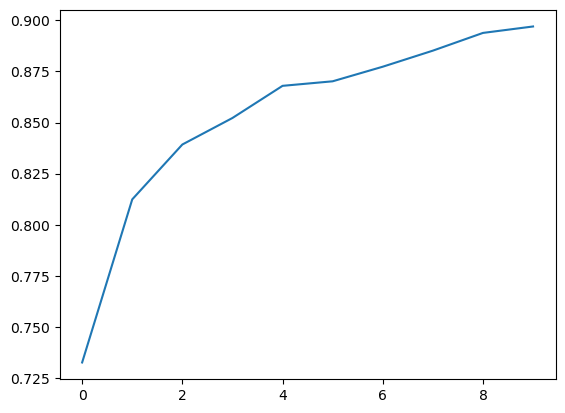

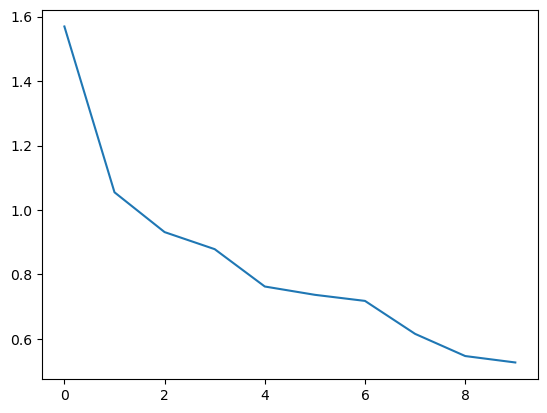

In [2]:
#Q 4.2

from torchvision import datasets, transforms
import torch

my_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST('mnist_data/', train=True, download=True, transform=my_transform)
test_dataset = datasets.MNIST('mnist_data/', train=False, download=True, transform=my_transform)

data_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True)
x_train_data = []
y_train_data = []
for x, y in data_loader:
    x_arr = np.matrix.flatten(np.array(x))
    x_train_data.append(x_arr)
    label = np.zeros(10)
    label[np.array(y)[0]] = 1
    y_train_data.append(label)
x_train_data = np.array(x_train_data)
y_train_data = np.array(y_train_data)
    
data_loader = torch.utils.data.DataLoader(test_dataset, shuffle=False)
x_test_data = []
y_test_data = []
for x, y in data_loader:
    x_arr = np.matrix.flatten(np.array(x))
    x_test_data.append(x_arr)
    label = np.zeros(10)
    label[np.array(y)[0]] = 1
    y_test_data.append(label)
x_test_data = np.array(x_test_data)
y_test_data = np.array(y_test_data)

def sigmoid(z):
    out = 1/(1 + np.exp(-z))
    return out

def softmax(z):
    z = z - np.max(z)
    exp_z = np.exp(z)
    out = exp_z / np.sum(exp_z)
    return out

def cross_entropy(y1, y2):
    out = -np.sum(y1 * np.log(y2))
    return out

def forward_pass(x, w1, w2, w3):
    h1 = np.dot(w1, x)
    s1 = sigmoid(h1)
    h2 = np.dot(w2, s1)
    s2 = sigmoid(h2)
    z = np.dot(w3, s2)
    y_hat = softmax(z)
    return h1, s1, h2, s2, z, y_hat

def backward_pass_(x, y, w1, w2, w3, h1, s1, h2, s2, z, y_hat, learn_rate):
    d4 = y_hat - y
    d3 = np.dot(w3.T, d4) * s2 * (1 - s2)
    d2 = np.dot(w2.T, d3) * s1 * (1 - s1)
    g_w3 = np.outer(d4, s2)
    g_w2 = np.outer(d3, s1)
    g_w1 = np.outer(d2, x)
    w3 -= learn_rate * g_w3
    w2 -= learn_rate * g_w2
    w1 -= learn_rate * g_w1
    return w1, w2, w3

def backward_pass(x, y, w1, w2, w3, h1, s1, h2, s2, z, y_hat, learn_rate):
    d4 = y_hat - y
    d3 = np.dot(w3.T, d4) * s2 * (1 - s2)
    d2 = np.dot(w2.T, d3) * s1 * (1 - s1)
    g_w3 = np.outer(d4, s2)
    g_w2 = np.outer(d3, s1)
    g_w1 = np.outer(d2, x)
    # w3 -= learn_rate * g_w3
    # w2 -= learn_rate * g_w2
    # w1 -= learn_rate * g_w1
    return g_w1, g_w2, g_w3


def train_nn(x_train_data, y_train_data, n_iter, learn_rate, d1, d2, k, batch_size, w_init):
    n_train, d0 = x_train_data.shape

    # w1 = np.random.randn(d1, d)
    # w2 = np.random.randn(d2, d1)
    # w3 = np.random.randn(k, d2)
    
    w1 = w_init[0]
    w2 = w_init[1]
    w3 = w_init[2]
    
    
    accuracy_iter = []
    loss_iter = []
    
    for n in range(n_iter):
        accuracy = 0
        loss = 0
        for i in range(0, n_train, batch_size):
            x_batch = x_train_data[i:i+batch_size]
            y_batch = y_train_data[i:i+batch_size]
            actual_batch_size = x_batch.shape[0]
            
            w1_ = w1
            w2_ = w2
            w3_ = w3
            for j in range(actual_batch_size):
                x = x_batch[j]
                y = y_batch[j]
                h1, s1, h2, s2, z, y_hat = forward_pass(x, w1_, w2_, w3_)
                if (np.argmax(y_hat) == np.argmax(y)):
                    accuracy += 1
                loss += cross_entropy(y, y_hat)
                g_w1, g_w2, g_w3 = backward_pass(x, y, w1_, w2_, w3_, h1, s1, h2, s2, z, y_hat, learn_rate)
                w1 -= learn_rate * g_w1
                w2 -= learn_rate * g_w2
                w3 -= learn_rate * g_w3
        accuracy /= n_train
        accuracy_iter.append(accuracy)
        loss /= n_train
        loss_iter.append(loss)
        print(f"iteration {n}, accuracy: {accuracy:.4f}, loss: {loss:.4f}")
    return w1, w2, w3, accuracy_iter, loss_iter
                                   

def test_nn(x_test_data, y_test_data, w1, w2, w3):
    n_test = x_test_data.shape[0]
    accuracy = 0
    loss = 0
    for i in range(n_test):
        x = x_test_data[i]
        y = y_test_data[i]
        _,_,_,_,_, y_hat = forward_pass(x, w1, w2, w3)
        if (np.argmax(y_hat) == np.argmax(y)):
            accuracy += 1
        loss += cross_entropy(y, y_hat)
    accuracy /= n_test
    loss /= n_test
    error_rate = 1 - accuracy
    print(f"error rate = {error_rate:.4f}")

d0 = x_train_data.shape[1]
d1 = 300
d2 = 200
k = 10
batch_size = 64
n_iter = 10
learn_rate = 0.1

w1 = np.random.randn(d1, d0)
w2 = np.random.randn(d2, d1)
w3 = np.random.randn(k, d2)
w_init = (w1, w2, w3)

w1, w2, w3, accuracies, losses = train_nn(x_train_data, y_train_data, n_iter, learn_rate, d1, d2, k, batch_size, w_init)

x = np.arange(n_iter)
plt.figure()
plt.plot(x, accuracies)
plt.figure()
plt.plot(x, losses)        
    
test_nn(x_test_data, y_test_data, w1, w2, w3)    

In [3]:
# Q4.3

iteration 0, accuracy: 0.1205, loss: 2.0666
iteration 1, accuracy: 0.1785, loss: 2.0301
iteration 2, accuracy: 0.1808, loss: 2.0267
iteration 3, accuracy: 0.1802, loss: 2.0276
iteration 4, accuracy: 0.1822, loss: 2.0239
iteration 5, accuracy: 0.1841, loss: 2.0205
iteration 6, accuracy: 0.1838, loss: 2.0204
iteration 7, accuracy: 0.1840, loss: 2.0198
iteration 8, accuracy: 0.1838, loss: 2.0195
iteration 9, accuracy: 0.1837, loss: 2.0171
error rate = 0.8247


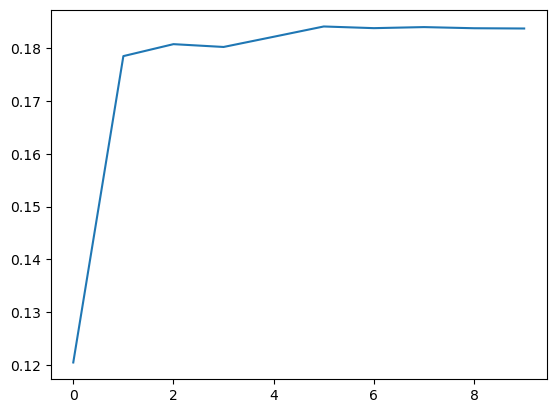

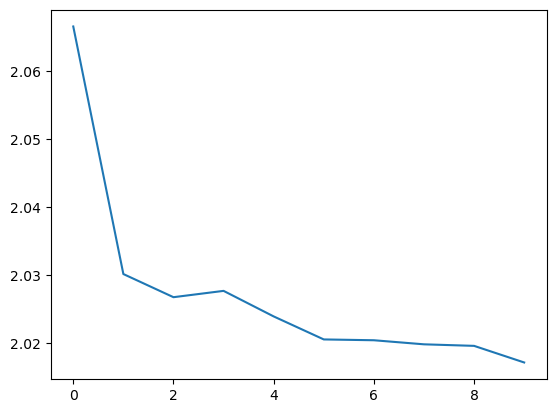

In [4]:
# Q4.4
d0 = x_train_data.shape[1]
d1 = 300
d2 = 200
k = 10
batch_size = 64
n_iter = 10
learn_rate = 0.1

w1 = np.zeros((d1, d0))
w2 = np.zeros((d2, d1))
w3 = np.zeros((k, d2))
w_init = (w1, w2, w3)

w1, w2, w3, accuracies, losses = train_nn(x_train_data, y_train_data, n_iter, learn_rate, d1, d2, k, batch_size, w_init)

x = np.arange(n_iter)
plt.figure()
plt.plot(x, accuracies)
plt.figure()
plt.plot(x, losses)        
    
test_nn(x_test_data, y_test_data, w1, w2, w3)    

iteration 0, accuracy: 0.8604, loss: 0.5405
iteration 1, accuracy: 0.9285, loss: 0.2441
iteration 2, accuracy: 0.9427, loss: 0.1919
iteration 3, accuracy: 0.9522, loss: 0.1590
iteration 4, accuracy: 0.9562, loss: 0.1440
iteration 5, accuracy: 0.9589, loss: 0.1355
iteration 6, accuracy: 0.9611, loss: 0.1278
iteration 7, accuracy: 0.9637, loss: 0.1198
iteration 8, accuracy: 0.9670, loss: 0.1076
iteration 9, accuracy: 0.9700, loss: 0.0976
error rate = 0.0391


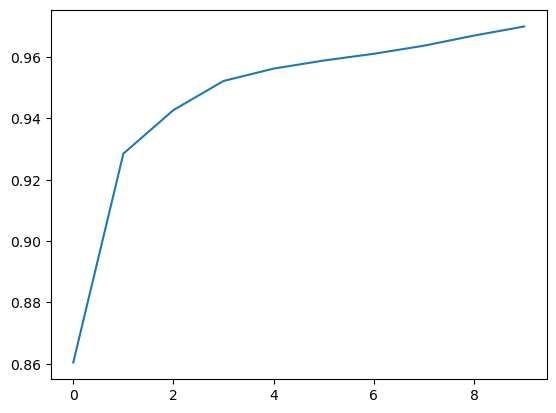

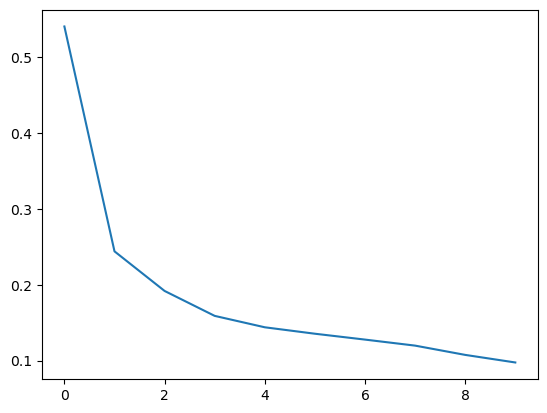

In [5]:
# Q4.4
d0 = x_train_data.shape[1]
d1 = 300
d2 = 200
k = 10
batch_size = 64
n_iter = 10
learn_rate = 0.1

w1 = np.random.uniform(-1, 1, (d1, d0))
w2 = np.random.uniform(-1, 1, (d2, d1))
w3 = np.random.uniform(-1, 1, (k, d2))
w_init = (w1, w2, w3)

w1, w2, w3, accuracies, losses = train_nn(x_train_data, y_train_data, n_iter, learn_rate, d1, d2, k, batch_size, w_init)

x = np.arange(n_iter)
plt.figure()
plt.plot(x, accuracies)
plt.figure()
plt.plot(x, losses)        
    
test_nn(x_test_data, y_test_data, w1, w2, w3)    